# 決定木モデル分析 【特徴量の重要度を可視化】
説明リンク -> https://brainsnacks.org/decisiontree/

In [1]:
#　必要なライブラリの読み込み
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#　機械学習モデル
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#　予測値の評価用　
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#sklean cancer dataの読み込み
from sklearn.datasets import load_breast_cancer

In [2]:
dataset = load_breast_cancer()

# 特徴量 (説明変数)
X = pd.DataFrame(dataset.data,
                 columns=dataset.feature_names)
#ラベル（目的変数)
y = pd.Series(dataset.target, name='y')

# データ詳細確認
print('X shape: (%i,%i)' %X.shape)
print(y.value_counts())
display(X.join(y).head())

X shape: (569,30)
1    357
0    212
Name: y, dtype: int64


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
# ホールドアウト
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0,stratify=y)
Column_List_train = X_train.columns

#ハイパーパラメータの調節は無し
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)

print("Decision_Tree_Cross-validation train_scores: {:.2f}".format(tree.score(X_train,y_train)))
print("Decision_Tree_Cross-validation test_scores: {:.2f}".format(tree.score(X_test,y_test)))

Decision_Tree_Cross-validation train_scores: 1.00
Decision_Tree_Cross-validation test_scores: 0.94


In [6]:
# ホールドアウト
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0,stratify=y)
Column_List_train = X_train.columns

#ハイパーパラメータの調節は無し
tree = DecisionTreeClassifier(random_state=0,max_depth=5)
tree.fit(X_train,y_train)

print("Decision_Tree_Cross-validation train_scores: {:.2f}".format(tree.score(X_train,y_train)))
print("Decision_Tree_Cross-validation test_scores: {:.2f}".format(tree.score(X_test,y_test)))

Decision_Tree_Cross-validation train_scores: 0.99
Decision_Tree_Cross-validation test_scores: 0.95


In [7]:
predict_result = tree.predict(X_test)
print(classification_report(y_test,predict_result, target_names=["悪性","良性" ]))

              precision    recall  f1-score   support

          悪性       0.91      0.95      0.93        42
          良性       0.97      0.94      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



Text(0.5, 0, 'Feature Importance')

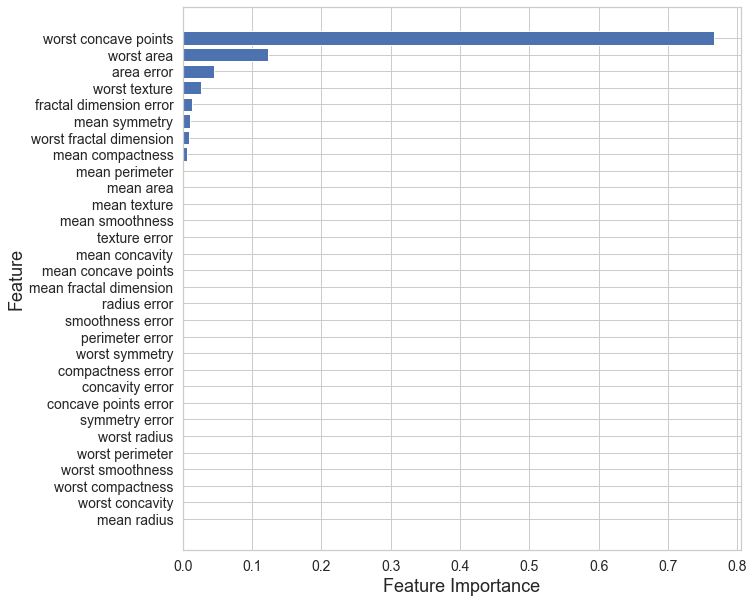

In [91]:
feature = tree.feature_importances_
label = X.columns
indices = np.argsort(feature)

# 特徴量の重要度の棒グラフ
fig =plt.figure (figsize = (10,10))

plt.barh(range(len(feature)), feature[indices])

plt.yticks(range(len(feature)), label[indices], fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel("Feature", fontsize=18)
plt.xlabel("Feature Importance", fontsize=18)